## Regression Model using Deep Learning

Boston housing prices dataset is used for this implementation.
For more info about this dataset checkout https://keras.io/api/datasets/boston_housing/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import boston_housing
from keras import layers, models
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [2]:
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

print('Train Data Shape: {}, Test Data Shape: {}'.format(train_data.shape, test_data.shape))

57344/57026 [==============================] - 0s 0us/step
Train Data Shape: (404, 13), Test Data Shape: (102, 13)


In [3]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

Normalizing the data

In [4]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

train_data[0]

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

Building Neural Network

In [5]:
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(16, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

model = build_model()

In [6]:
k = 4
n_epochs = 100
num_val_samples = len(train_data) // k
all_scores = []

for i in range(k):
  print('Processing fold #' + str(i))
  val_data = train_data[i*num_val_samples: (i+1)*num_val_samples]
  val_labels = train_labels[i*num_val_samples: (i+1)*num_val_samples]

  p_train = np.concatenate([train_data[:i*num_val_samples], train_data[(i+1)*num_val_samples:]], axis=0)
  p_label = np.concatenate([train_labels[:i*num_val_samples], train_labels[(i+1)*num_val_samples:]], axis=0)

  model = build_model()
  model.fit(p_train, p_label, epochs=n_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_labels, verbose=0)
  all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [10]:
all_scores

[2.1103076934814453, 2.4193384647369385, 2.765873908996582, 2.179680585861206]

In [9]:
np.mean(all_scores)

2.368800163269043

In [17]:
n_epochs = 500
all_mae_histories = []
for i in range(k):
  print('Processing fold #' + str(i))
  val_data = train_data[i*num_val_samples: (i+1)*num_val_samples]
  val_labels = train_labels[i*num_val_samples: (i+1)*num_val_samples]

  p_train = np.concatenate([train_data[:i*num_val_samples], train_data[(i+1)*num_val_samples:]], axis=0)
  p_label = np.concatenate([train_labels[:i*num_val_samples], train_labels[(i+1)*num_val_samples:]], axis=0)

  model = build_model()
  history = model.fit(p_train, p_label, epochs=n_epochs, validation_data=(val_data, val_labels), batch_size=1, verbose=0)
  mae_history = history.history['val_mae']
  all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [32]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(n_epochs)]
average_mae_history

[6.5245667695999146,
 3.95578670501709,
 3.3163830637931824,
 3.056258976459503,
 2.957855522632599,
 2.8968091011047363,
 2.7563844323158264,
 2.6658613681793213,
 2.550699532032013,
 2.647996962070465,
 2.516738533973694,
 2.4433013200759888,
 2.4826367497444153,
 2.5183061361312866,
 2.4456689953804016,
 2.4156845211982727,
 2.3719789385795593,
 2.4987354278564453,
 2.381668746471405,
 2.4583699703216553,
 2.4568225145339966,
 2.3637586534023285,
 2.381525158882141,
 2.3694424629211426,
 2.4166552424430847,
 2.3904942870140076,
 2.436776280403137,
 2.424078345298767,
 2.3359756767749786,
 2.407044231891632,
 2.3917897045612335,
 2.4686275720596313,
 2.4099327325820923,
 2.376586437225342,
 2.291599452495575,
 2.2848052382469177,
 2.2905585765838623,
 2.3899866938591003,
 2.358231842517853,
 2.2731942534446716,
 2.3714415431022644,
 2.4179248809814453,
 2.3566988110542297,
 2.3826370239257812,
 2.2795754075050354,
 2.400692880153656,
 2.431674838066101,
 2.296145737171173,
 2.3746964

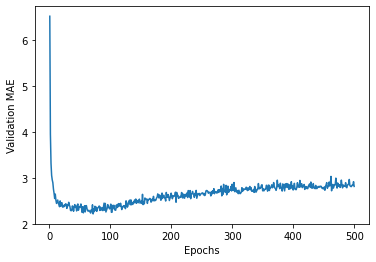

In [33]:
plt.plot(range(1, len(average_mae_history)+1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [36]:
model = build_model()
model.fit(train_data, train_labels, epochs=80, batch_size=16, verbose=0)
test_mse, test_mae = model.evaluate(test_data, test_labels)
test_mae

4/4 [==============================] - 0s 2ms/step - loss: 19.5480 - mae: 2.7232


2.7232139110565186

Based on MAE test scores, the prediction is off by about $2723